In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, 'Label: 8')

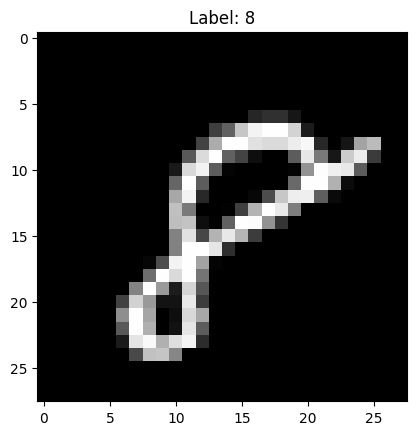

In [26]:
plt.imshow(X_train[60000-1], cmap= 'gray')
plt.title(f"Label: {y_train[60000-1]}")

In [27]:
X_train = X_train/255.0
X_test = X_test/255.0

In [28]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\HomePC\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9973 - loss: 0.0107 - val_accuracy: 0.9753 - val_loss: 0.0996
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9984 - loss: 0.0077 - val_accuracy: 0.9761 - val_loss: 0.0972
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9759 - val_loss: 0.1045
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9981 - loss: 0.0073 - val_accuracy: 0.9753 - val_loss: 0.1166
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9981 - loss: 0.0063 - val_accuracy: 0.9754 - val_loss: 0.1082
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9982 - loss: 0.0063 - val_accuracy: 0.9753 - val_loss: 0.1131
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9783 - val_loss: 0.1095
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9991 - loss: 0.0037 - 

In [45]:
y_pred = model.predict(X_test).argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


In [46]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9785

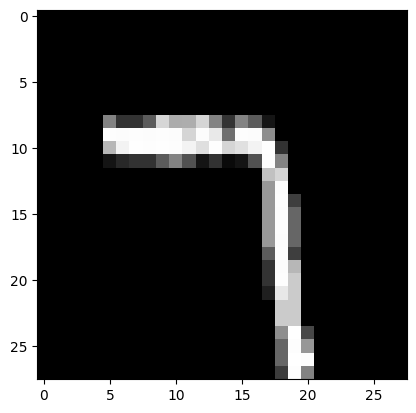

In [48]:
plt.imshow(X_test[5999], cmap='gray')

In [49]:
model.predict(X_test[5999].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([7], dtype=int64)

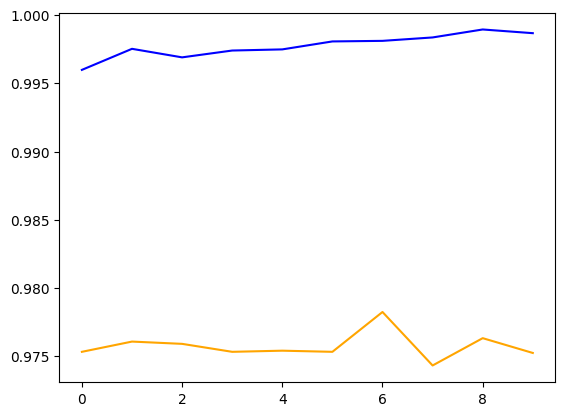

In [54]:
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='orange')